In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [43]:
df.shape

(103, 7)

In [44]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


## Data Cleaning

In [45]:
#Here we replaced the dot(.) with comma(,) in Production (Tons) column
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")

In [46]:
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [47]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [48]:
#Renaming the columns
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"ProductionPerPerson(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)


In [49]:
#Checking the null values
df.isnull().sum()

Unnamed: 0                 0
Country                    0
Continent                  0
Production(Tons)           0
ProductionPerPerson(Kg)    0
Acreage(Hectare)           1
Yield(Kg/Hectare)          1
dtype: int64

In [50]:
df[df["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),ProductionPerPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [51]:
#Removed the null value
df=df.dropna().reset_index()

In [52]:
#removing the index column and unnamed column from the dataset
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)

In [53]:
df.head()

,Country,Continent,Production(Tons),ProductionPerPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [54]:
#datatypes of the column
df.dtypes

Country                    object
Continent                  object
Production(Tons)           object
ProductionPerPerson(Kg)    object
Acreage(Hectare)           object
Yield(Kg/Hectare)          object
dtype: object

In [55]:
#changing the datatypes
df["Production(Tons)"]=df["Production(Tons)"].astype(float)
df["ProductionPerPerson(Kg)"]=df["ProductionPerPerson(Kg)"].astype(float)
df["Acreage(Hectare)"]=df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"]=df["Yield(Kg/Hectare)"].astype(float)

In [56]:
df.dtypes

Country                     object
Continent                   object
Production(Tons)           float64
ProductionPerPerson(Kg)    float64
Acreage(Hectare)           float64
Yield(Kg/Hectare)          float64
dtype: object

In [58]:
#finding unique values
df.nunique()

Country                    102
Continent                    6
Production(Tons)           102
ProductionPerPerson(Kg)    101
Acreage(Hectare)           101
Yield(Kg/Hectare)          102
dtype: int64

## Univariate Analysis

In [59]:
#Count of countries producing sugarcane in a continent
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

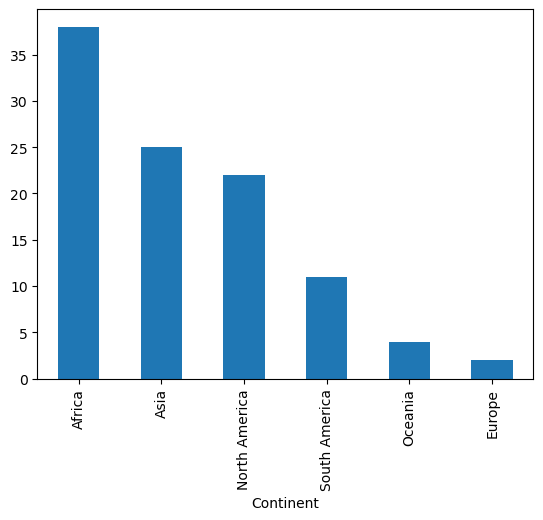

In [60]:
df["Continent"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

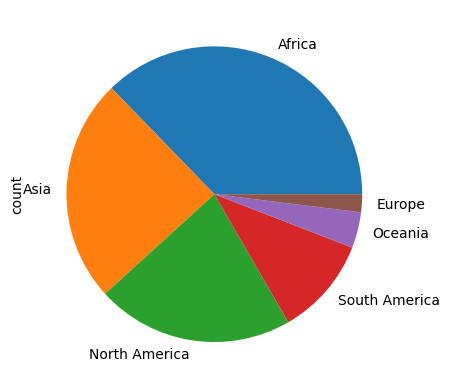

In [68]:
df["Continent"].value_counts().plot(kind="pie")

In [61]:
df.describe()

,Production(Tons),ProductionPerPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Checking Outliers

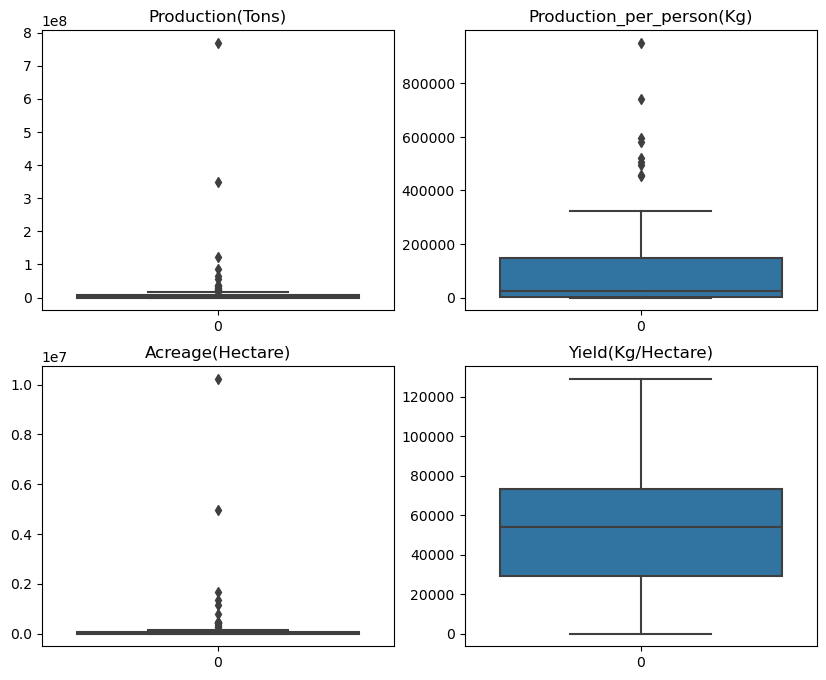

In [63]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["ProductionPerPerson(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

<Axes: >

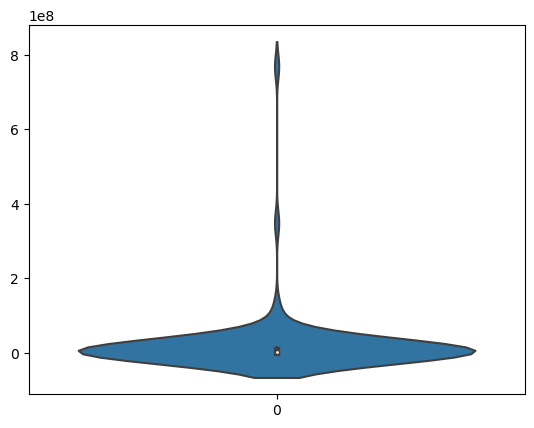

In [65]:
#violin plot
sns.violinplot(df["Production(Tons)"])

## Bivariate Analysis

In [69]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")

In [70]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [72]:
df_new["Production(Tons)_Percent"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()

In [73]:
df_new

,Production(Tons),Production(Tons)_Percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_Percent'>

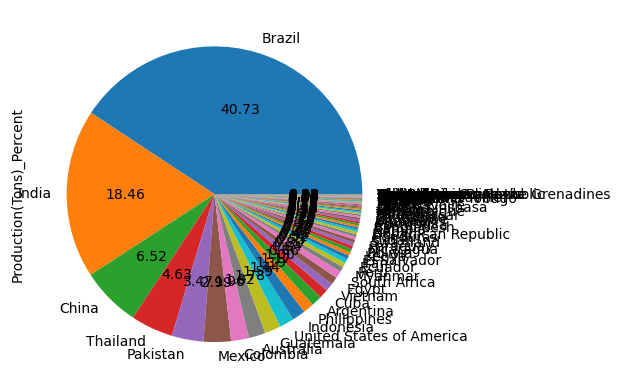

In [78]:
df_new["Production(Tons)_Percent"].plot(kind="pie",autopct="%.2f")

#### Brazil, India and China produce 65% of the sugarcane

<Axes: xlabel='Country'>

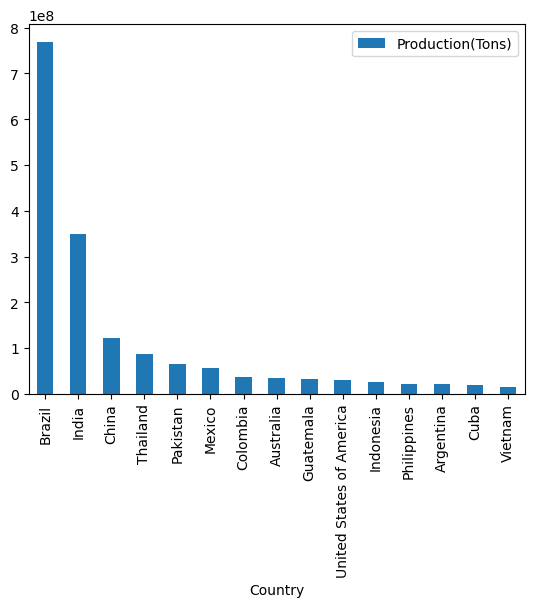

In [79]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")

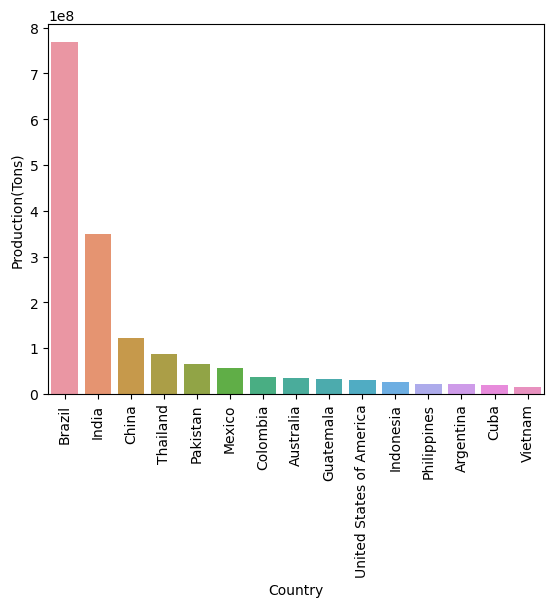

In [80]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Brazil produces highest amount of sugarcane

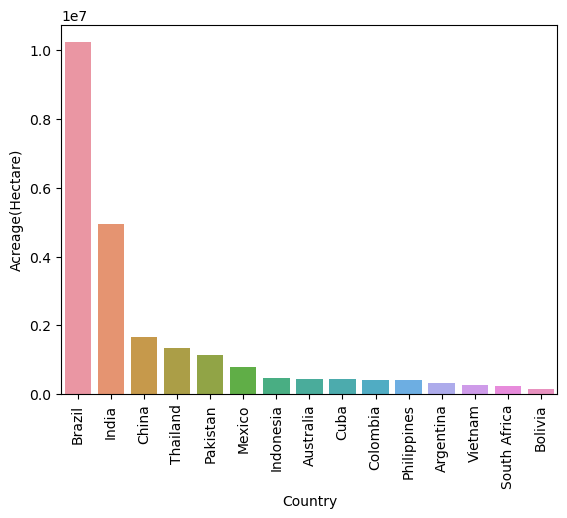

In [81]:
#Country having highest land
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

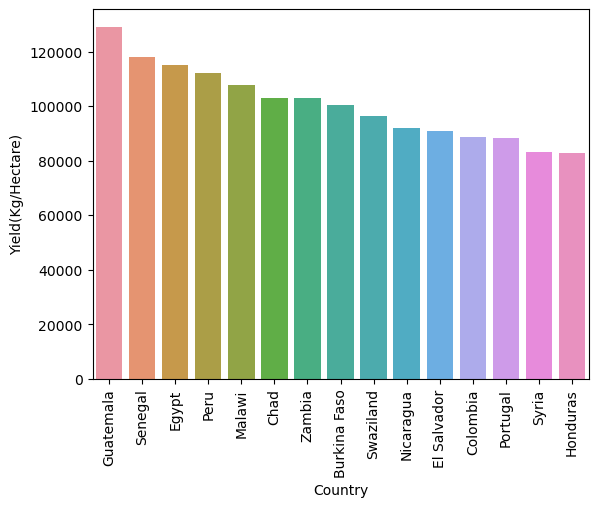

In [85]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yield,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

#### Guatemala has the highest yield(kg/hectare)

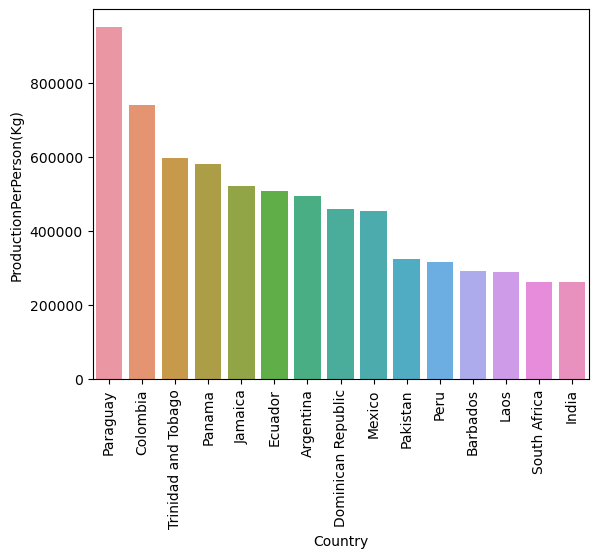

In [87]:
df_prod = df.sort_values("ProductionPerPerson(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_prod,  x= "Country", y = "ProductionPerPerson(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()


#### Production per Person is highest in Paraguay

## Correlation


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

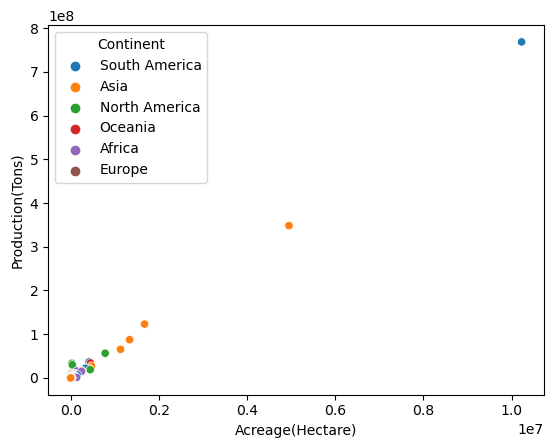

In [91]:
sns.scatterplot(data = df, x = "Acreage(Hectare)", y = "Production(Tons)", hue = "Continent" )

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

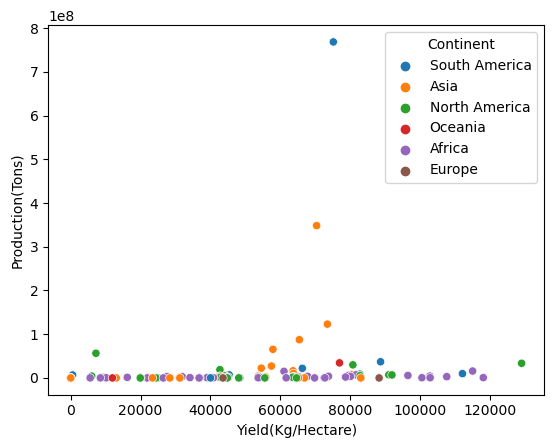

In [92]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

In [94]:
df_continent = df.groupby("Continent").sum()

In [95]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [96]:
df_continent

,Country,Production(Tons),ProductionPerPerson(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: xlabel='Continent'>

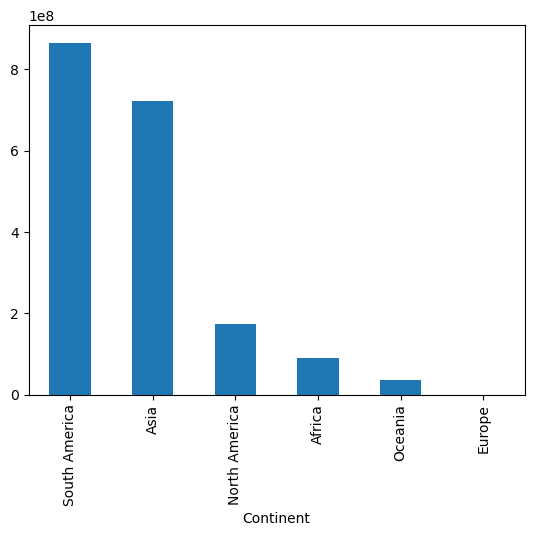

In [97]:
#Country producing maximum sugarcane
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

#### South America produces maximum sugarcane

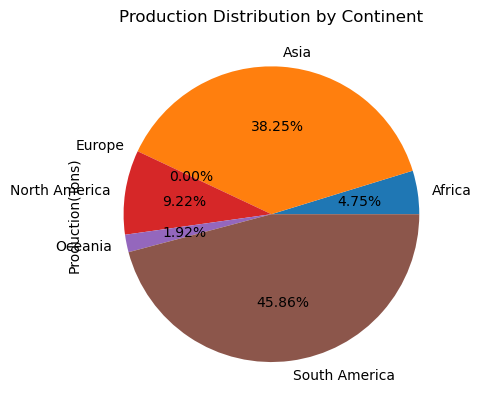

In [98]:
#Production Distribution by continent
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()